### Prerequsite - Upgrade Scikit Learn
The current workspace has scikit-learn v0.19.1 installed. However, you can upgrade scikit-learn to 0.24.x. and use this [OneHotEncoder](https://scikit-learn.org/0.21/modules/generated/sklearn.preprocessing.OneHotEncoder.html) library. 


In [1]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.4.1.post1.


In [2]:
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

In [ ]:
!python -m pip install --upgrade scikit-learn
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

In [4]:
# Now you can import and use OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
# your code goes here

In [ ]:
# Similarly, should you need any other package, they can install it as:
!python -m pip install 'tensorflow-tensorboard<0.2.0,>=0.1.0'

# Project: Identify Customer Segments

In this project, you will apply unsupervised learning techniques to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

This notebook will help you complete this task by providing a framework within which you will perform your analysis steps. In each step of the project, you will see some text describing the subtask that you will perform, followed by one or more code cells for you to complete your work. **Feel free to add additional code and markdown cells as you go along so that you can explore everything in precise chunks.** The code cells provided in the base template will outline only the major tasks, and will usually not be enough to cover all of the minor tasks that comprise it.

It should be noted that while there will be precise guidelines on how you should handle certain tasks in the project, there will also be places where an exact specification is not provided. **There will be times in the project where you will need to make and justify your own decisions on how to treat the data.** These are places where there may not be only one way to handle the data. In real-life tasks, there may be many valid ways to approach an analysis task. One of the most important things you can do is clearly document your approach so that other scientists can understand the decisions you've made.

At the end of most sections, there will be a Markdown cell labeled **Discussion**. In these cells, you will report your findings for the completed section, as well as document the decisions that you made in your approach to each subtask. **Your project will be evaluated not just on the code used to complete the tasks outlined, but also your communication about your observations and conclusions at each stage.**

In [6]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline

'''
Import note: The classroom currently uses sklearn version 0.19.
If you need to use an imputer, it is available in sklearn.preprocessing.Imputer,
instead of sklearn.impute as in newer versions of sklearn.
'''
pd.options.display.max_rows = None
pd.options.display.max_columns = None

### Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. You will use this information to cluster the general population into groups with similar demographic properties. Then, you will see how the people in the customers dataset fit into those created clusters. The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.

To start off with, load in the demographics data for the general population into a pandas DataFrame, and do the same for the feature attributes summary. Note for all of the `.csv` data files in this project: they're semicolon (`;`) delimited, so you'll need an additional argument in your [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call to read in the data properly. Also, considering the size of the main dataset, it may take some time for it to load completely.

Once the dataset is loaded, it's recommended that you take a little bit of time just browsing the general structure of the dataset and feature summary file. You'll be getting deep into the innards of the cleaning in the first major step of the project, so gaining some general familiarity can help you get your bearings.

In [7]:
# Load in the general demographics data.
demographic_data = pd.read_csv("Udacity_AZDIAS_Subset.csv", sep=";")
# demographic_data.fillna(0, inplace=True)

# Load in the feature summary file.
feat_info = pd.read_csv("AZDIAS_Feature_Summary.csv", sep=";")

In [8]:
demographic_data.head(20)

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,GEBURTSJAHR,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,LP_FAMILIE_FEIN,LP_FAMILIE_GROB,LP_STATUS_FEIN,LP_STATUS_GROB,NATIONALITAET_KZ,PRAEGENDE_JUGENDJAHRE,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SHOPPER_TYP,SOHO_KZ,TITEL_KZ,VERS_TYP,ZABEOTYP,ALTER_HH,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,KK_KUNDENTYP,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,GEBAEUDETYP,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,WOHNLAGE,CAMEO_DEUG_2015,CAMEO_DEU_2015,CAMEO_INTL_2015,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_BAUMAX,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,-1,2,1,2.0,3,4,3,5,5,3,4,0,10.0,0,-1,15.0,4.0,2.0,2.0,1.0,1.0,0,0,5.0,2,6,7,5,1,5,3,3,4,7,6,6,5,3,-1,NaN,NaN,-1,3,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,1,2,5.0,1,5,2,5,4,5,1,1996,10.0,0,3,21.0,6.0,5.0,3.0,2.0,1.0,1,14,1.0,5,4,4,3,1,2,2,3,6,4,7,4,7,6,3,1.0,0.0,2,5,0.0,2.0,0.0,6.0,NaN,3.0,9.0,11.0,0.0,8.0,1.0,1992.0,W,4.0,8,8A,51,0.0,0.0,0.0,2.0,5.0,1.0,6.0,3.0,8.0,3.0,2.0,1.0,3.0,3.0,963.0,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,-1,3,2,3.0,1,4,1,2,3,5,1,1979,10.0,1,3,3.0,1.0,1.0,1.0,3.0,2.0,1,15,3.0,4,1,3,3,4,4,6,3,4,7,7,7,3,3,2,0.0,0.0,1,5,17.0,1.0,0.0,4.0,NaN,3.0,9.0,10.0,0.0,1.0,5.0,1992.0,W,2.0,4,4C,24,1.0,3.0,1.0,0.0,0.0,3.0,2.0,4.0,4.0,4.0,2.0,3.0,2.0,2.0,712.0,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2,4,2,2.0,4,2,5,2,1,2,6,1957,1.0,0,2,0.0,0.0,0.0,0.0,9.0,4.0,1,8,2.0,5,1,2,1,4,4,7,4,3,4,4,5,4,4,1,0.0,0.0,1,3,13.0,0.0,0.0,1.0,NaN,NaN,9.0,1.0,0.0,1.0,4.0,1997.0,W,7.0,2,2A,12,4.0,1.0,0.0,0.0,1.0,4.0,4.0,2.0,6.0,4.0,0.0,4.0,1.0,0.0,596.0,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,-1,3,1,5.0,4,3,4,1,3,2,5,1963,5.0,0,3,32.0,10.0,10.0,5.0,3.0,2.0,1,8,5.0,6,4,4,2,7,4,4,6,2,3,2,2,4,2,2,0.0,0.0,2,4,20.0,4.0,0.0,5.0,1.0,2.0,9.0,3.0,0.0,1.0,4.0,1992.0,W,3.0,6,6B,43,1.0,4.0,1.0,0.0,0.0,3.0,2.0,5.0,1.0,5.0,3.0,3.0,5.0,5.0,435.0,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0
5,3,1,2,2.0,3,1,5,2,2,5,2,1943,1.0,0,3,8.0,2.0,1.0,1.0,4.0,2.0,1,3,3.0,2,4,7,4,2,2,2,5,7,4,4,4,7,6,0,0.0,0.0,2,4,10.0,1.0,0.0,5.0,3.0,6.0,9.0,5.0,0.0,1.0,5.0,1992.0,W,7.0,8,8C,54,2.0,2.0,0.0,0.0,0.0,4.0,6.0,2.0,7.0,4.0,4.0,4.0,1.0,5.0,1300.0,2.0,3.0,1.0,1.0,1.0,5.0,5.0,2.0,3.0,3.0
6,-1,2,2,5.0,1,5,1,5,4,3,4,0,12.0,0,2,2.0,1.0,1.0,1.0,2.0,1.0,1,10,4.0,2,5,5,7,2,6,5,5,7,7,4,7,7,7,1,0.0,0.0,1,4,0.0,1.0,0.0,6.0,NaN,3.0,9.0,4.0,0.0,1.0,5.0,1992.0,W,5.0,4,4A,22,3.0,2.0,0.0,0.0,1.0,3.0,6.0,4.0,3.0,5.0,3.0,5.0,2.0,5.0,867.0,3.0,3.0,1.0,0.0,1.0,5.0,5.0,4.0,6.0,3.0
7,-1,1,1,3.0,3,3,4,1,3,2,5,1964,9.0,0,1,5.0,2.0,1.0,1.0,1.0,1.0,1,8,5.0,7,7,7,5,6,2,2,7,5,1,1,2,5,5,0,0.0,0.0,1,1,14.0,1.0,0.0,4.0,NaN,5.0,9.0,6.0,0.0,8.0,3.0,1992.0,W,1.0,2,2D,14,2.0,2.0,0.0,0.0,0.0,4.0,2.0,5.0,3.0,4.0,1.0,4.0,1.0,1.0,758.0,3.0,3.0,1.0,0.0,1.0,4.0,4.0,2.0,5.0,2.0
8,-1,3,1,3.0,4,4,2,4,2,2,6,1974,3.0,1,3,10.0,3.0,1.0,1.0,10.0,5.0,1,11,4.0,4,5,4,1,5,6,4,5,2,5,5,3,1,4,3,0.0,0.0,2,6,16.0,1.0,0.0,3.0,NaN,5.0,8.0,2.0,1.0,3.0,4.0,1992.0,W,1.0,1,1A,13,1.0,1.0,0.0,0.0,0.0,5.0,3.0,4.0,4.0,4.0,1.0,3.0,2.0,3.0,511.0,2.0,3.0,2.0,1.0,1.0,3.0,3.0,2.0,4.0,3.0
9,-1,3,2,4.0,2,4,2,3,5,4,1,1975,12.0,1,2,4.0,1.0,1.0,1.0,3.0,2.0,1,15,4.0,2,1,1,3,2,6,6,3,4,7,6,7,1,3,3,0.0,0.0,2,4,17.0,1.0,0.0,4.0,6.0,4.0,3.0,9.0,0.0,3.0,4.0,1992.0,W,7.0,1,1E,15,1.0,3.0,1.0,0.0,0.0,2.0,6.0,5.0,4.0,3.0,1.0,3.0,3.0,1.0,530.0,2.0,3.0,2.0,1.0,1.0,3.0,3.0,2.0,3.0,1.0


In [9]:
# Check the structure of the data after it's loaded (e.g. print the number of
# rows and columns, print the first few rows)

print(demographic_data.shape)
# demographic_data.head()
# demographic_data.describe()

# print(feat_info.shape)
# feat_info["missing_or_unknown"]
# feat_info.describe()
feat_info


(891221, 85)


,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]
5,FINANZ_SPARER,person,ordinal,[-1]
6,FINANZ_VORSORGER,person,ordinal,[-1]
7,FINANZ_ANLEGER,person,ordinal,[-1]
8,FINANZ_UNAUFFAELLIGER,person,ordinal,[-1]
9,FINANZ_HAUSBAUER,person,ordinal,[-1]


> **Tip**: Add additional cells to keep everything in reasonably-sized chunks! Keyboard shortcut `esc --> a` (press escape to enter command mode, then press the 'A' key) adds a new cell before the active cell, and `esc --> b` adds a new cell after the active cell. If you need to convert an active cell to a markdown cell, use `esc --> m` and to convert to a code cell, use `esc --> y`. 

## Step 1: Preprocessing

### Step 1.1: Assess Missing Data

The feature summary file contains a summary of properties for each demographics data column. You will use this file to help you make cleaning decisions during this stage of the project. First of all, you should assess the demographics data in terms of missing data. Pay attention to the following points as you perform your analysis, and take notes on what you observe. Make sure that you fill in the **Discussion** cell with your findings and decisions at the end of each step that has one!

#### Step 1.1.1: Convert Missing Value Codes to NaNs
The fourth column of the feature attributes summary (loaded in above as `feat_info`) documents the codes from the data dictionary that indicate missing or unknown data. While the file encodes this as a list (e.g. `[-1,0]`), this will get read in as a string object. You'll need to do a little bit of parsing to make use of it to identify and clean the data. Convert data that matches a 'missing' or 'unknown' value code into a numpy NaN value. You might want to see how much data takes on a 'missing' or 'unknown' code, and how much data is naturally missing, as a point of interest.

**As one more reminder, you are encouraged to add additional cells to break up your analysis into manageable chunks.**

In [10]:
# Identify missing or unknown data values and convert them to NaNs.                
def convertStringToList(str):
    str = str[1:-1].split(",")
    return [x if x.strip() in ['X', 'XX', ''] else int(x) for x in str]

feat_info["na_tags"] = feat_info["missing_or_unknown"].apply(convertStringToList)
feat_info

,attribute,information_level,type,missing_or_unknown,na_tags
0,AGER_TYP,person,categorical,"[-1,0]","[-1, 0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]","[-1, 0, 9]"
2,ANREDE_KZ,person,categorical,"[-1,0]","[-1, 0]"
3,CJT_GESAMTTYP,person,categorical,[0],[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1],[-1]
5,FINANZ_SPARER,person,ordinal,[-1],[-1]
6,FINANZ_VORSORGER,person,ordinal,[-1],[-1]
7,FINANZ_ANLEGER,person,ordinal,[-1],[-1]
8,FINANZ_UNAUFFAELLIGER,person,ordinal,[-1],[-1]
9,FINANZ_HAUSBAUER,person,ordinal,[-1],[-1]


In [11]:
# Inserting NA values into Dataframe
# Create new Dataframe with attribute as the index to access the row
att_index = feat_info.set_index('attribute')
# att_index
# Create a copy of the demographic data
na_demographic_data = demographic_data[:]
na_demographic_data.head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,GEBURTSJAHR,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,LP_FAMILIE_FEIN,LP_FAMILIE_GROB,LP_STATUS_FEIN,LP_STATUS_GROB,NATIONALITAET_KZ,PRAEGENDE_JUGENDJAHRE,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SHOPPER_TYP,SOHO_KZ,TITEL_KZ,VERS_TYP,ZABEOTYP,ALTER_HH,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,KK_KUNDENTYP,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,GEBAEUDETYP,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,WOHNLAGE,CAMEO_DEUG_2015,CAMEO_DEU_2015,CAMEO_INTL_2015,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_BAUMAX,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,-1,2,1,2.0,3,4,3,5,5,3,4,0,10.0,0,-1,15.0,4.0,2.0,2.0,1.0,1.0,0,0,5.0,2,6,7,5,1,5,3,3,4,7,6,6,5,3,-1,NaN,NaN,-1,3,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,1,2,5.0,1,5,2,5,4,5,1,1996,10.0,0,3,21.0,6.0,5.0,3.0,2.0,1.0,1,14,1.0,5,4,4,3,1,2,2,3,6,4,7,4,7,6,3,1.0,0.0,2,5,0.0,2.0,0.0,6.0,NaN,3.0,9.0,11.0,0.0,8.0,1.0,1992.0,W,4.0,8,8A,51,0.0,0.0,0.0,2.0,5.0,1.0,6.0,3.0,8.0,3.0,2.0,1.0,3.0,3.0,963.0,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,-1,3,2,3.0,1,4,1,2,3,5,1,1979,10.0,1,3,3.0,1.0,1.0,1.0,3.0,2.0,1,15,3.0,4,1,3,3,4,4,6,3,4,7,7,7,3,3,2,0.0,0.0,1,5,17.0,1.0,0.0,4.0,NaN,3.0,9.0,10.0,0.0,1.0,5.0,1992.0,W,2.0,4,4C,24,1.0,3.0,1.0,0.0,0.0,3.0,2.0,4.0,4.0,4.0,2.0,3.0,2.0,2.0,712.0,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2,4,2,2.0,4,2,5,2,1,2,6,1957,1.0,0,2,0.0,0.0,0.0,0.0,9.0,4.0,1,8,2.0,5,1,2,1,4,4,7,4,3,4,4,5,4,4,1,0.0,0.0,1,3,13.0,0.0,0.0,1.0,NaN,NaN,9.0,1.0,0.0,1.0,4.0,1997.0,W,7.0,2,2A,12,4.0,1.0,0.0,0.0,1.0,4.0,4.0,2.0,6.0,4.0,0.0,4.0,1.0,0.0,596.0,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,-1,3,1,5.0,4,3,4,1,3,2,5,1963,5.0,0,3,32.0,10.0,10.0,5.0,3.0,2.0,1,8,5.0,6,4,4,2,7,4,4,6,2,3,2,2,4,2,2,0.0,0.0,2,4,20.0,4.0,0.0,5.0,1.0,2.0,9.0,3.0,0.0,1.0,4.0,1992.0,W,3.0,6,6B,43,1.0,4.0,1.0,0.0,0.0,3.0,2.0,5.0,1.0,5.0,3.0,3.0,5.0,5.0,435.0,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


In [12]:
# Replace the missing or unknown codes in the demographic data with np.NaN
for att in na_demographic_data.columns:
    na_demographic_data[att].replace(att_index.loc[att].loc['na_tags'], np.NaN, inplace=True)

/var/folders/yj/9my9v6pj42vfm5ppv37xtk9w0000gn/T/ipykernel_94817/3461818847.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  na_demographic_data[att].replace(att_index.loc[att].loc['na_tags'], np.NaN, inplace=True)


#### Step 1.1.2: Assess Missing Data in Each Column

How much missing data is present in each column? There are a few columns that are outliers in terms of the proportion of values that are missing. You will want to use matplotlib's [`hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function to visualize the distribution of missing value counts to find these columns. Identify and document these columns. While some of these columns might have justifications for keeping or re-encoding the data, for this project you should just remove them from the dataframe. (Feel free to make remarks about these outlier columns in the discussion, however!)

For the remaining features, are there any patterns in which columns have, or share, missing data?

In [13]:
# Perform an assessment of how much missing data there is in each column of the
# dataset.
missing_data_list = []
for col in na_demographic_data.columns:
    missing_data_list.append(na_demographic_data[col].isna().sum())
np.sum(missing_data_list)

8373929

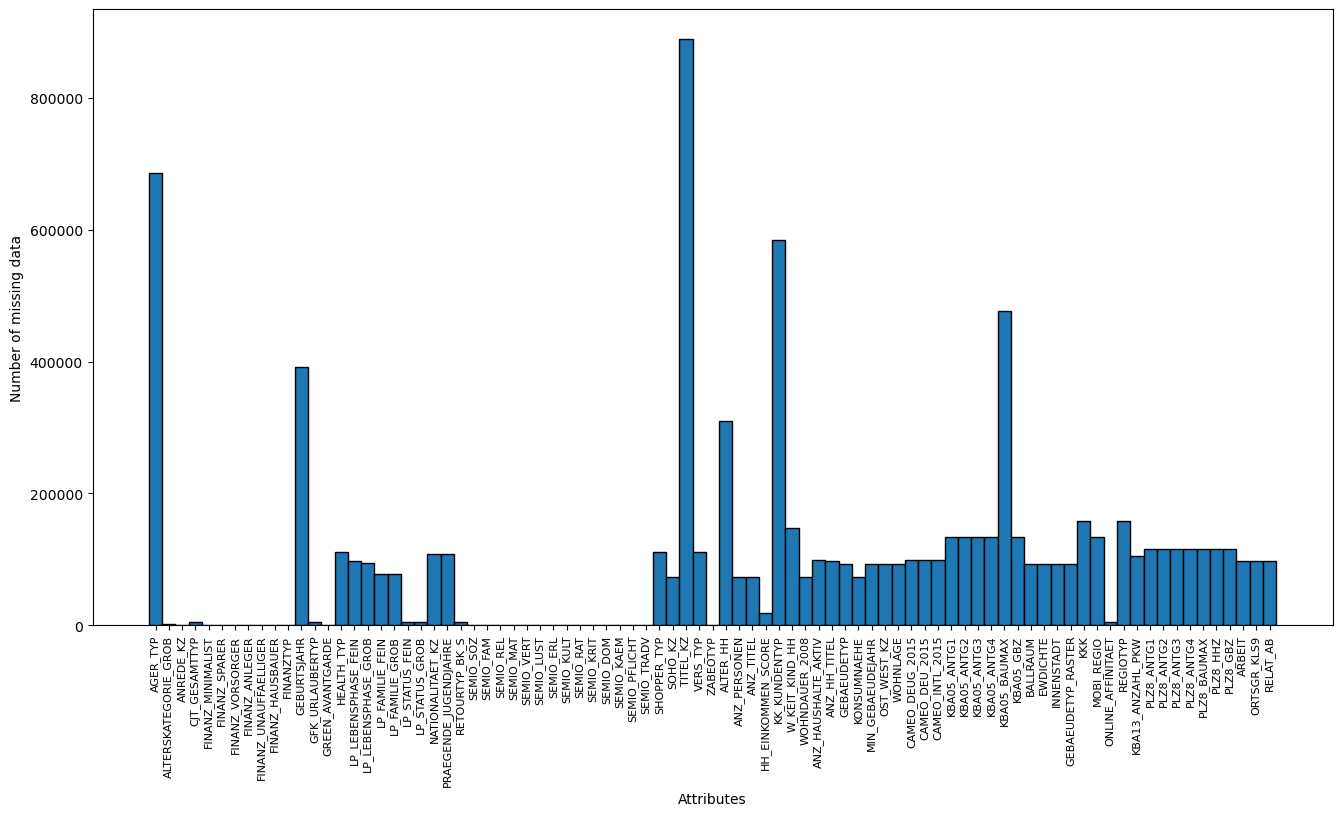

In [14]:
# Investigate patterns in the amount of missing data in each column.

plt.figure(figsize=(16, 8))

# Subtracting 0.5 from the index to center the bars on the indices
bins = np.arange(len(missing_data_list) + 1) - 0.5
plt.hist(na_demographic_data.columns, bins=bins, weights=missing_data_list, edgecolor='black')

plt.xlabel('Attributes')
plt.xticks(rotation=90, fontsize=8)
plt.ylabel('Number of missing data')
plt.show()

In [15]:
# Remove the outlier columns from the dataset. (You'll perform other data
# engineering tasks such as re-encoding and imputation later.)
missing_percentage_per_column = (na_demographic_data.isnull().sum()/len(na_demographic_data))*100
outlier_columns = list(missing_percentage_per_column[missing_percentage_per_column > 30.0].index)
demographic_data_cleaned = na_demographic_data.drop(outlier_columns, axis=1)
demographic_data_cleaned.shape

(891221, 79)

In [16]:
outlier_columns

['AGER_TYP',
 'GEBURTSJAHR',
 'TITEL_KZ',
 'ALTER_HH',
 'KK_KUNDENTYP',
 'KBA05_BAUMAX']

#### Discussion 1.1.2: Assess Missing Data in Each Column

From the histogram plot we can see that out of 85 distinct features, only 6 features are having more than 30% of its data are unknown or missing. Apart from those 6 columns, other columns are having lesser than 20% data are missing or unknown. We can clearly see that their is a visible gap between the outliers and the others. They are seperated by almost 10%. That's the reason to chose 30% or more to seperate outliers. The columns that dropped are
 1. 'AGER_TYP'
 2. 'GEBURTSJAHR'
 3. 'TITEL_KZ'
 4. 'ALTER_HH'
 5. 'KK_KUNDENTYP'
 6. 'KBA05_BAUMAX'.

#### Step 1.1.3: Assess Missing Data in Each Row

Now, you'll perform a similar assessment for the rows of the dataset. How much data is missing in each row? As with the columns, you should see some groups of points that have a very different numbers of missing values. Divide the data into two subsets: one for data points that are above some threshold for missing values, and a second subset for points below that threshold.

In order to know what to do with the outlier rows, we should see if the distribution of data values on columns that are not missing data (or are missing very little data) are similar or different between the two groups. Select at least five of these columns and compare the distribution of values.
- You can use seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) function to create a bar chart of code frequencies and matplotlib's [`subplot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) function to put bar charts for the two subplots side by side.
- To reduce repeated code, you might want to write a function that can perform this comparison, taking as one of its arguments a column to be compared.

Depending on what you observe in your comparison, this will have implications on how you approach your conclusions later in the analysis. If the distributions of non-missing features look similar between the data with many missing values and the data with few or no missing values, then we could argue that simply dropping those points from the analysis won't present a major issue. On the other hand, if the data with many missing values looks very different from the data with few or no missing values, then we should make a note on those data as special. We'll revisit these data later on. **Either way, you should continue your analysis for now using just the subset of the data with few or no missing values.**

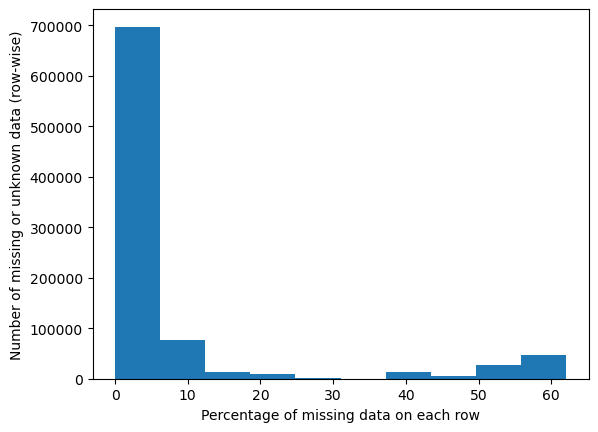

In [17]:
# How much data is missing in each row of the dataset?
num_missing_row_data = demographic_data_cleaned.isna().sum(axis=1)
num_missing_row_percentage = num_missing_row_data/demographic_data_cleaned.shape[1] * 100

## Plotting first 500 rows as sample visualization
plt.hist(num_missing_row_percentage)
plt.xlabel('Percentage of missing data on each row')
plt.ylabel('Number of missing or unknown data (row-wise)')
plt.show()

In [18]:
# Number of rows > 25 and the rest
thresh = 25.0
num_greater_than_thresh = (num_missing_row_percentage >= thresh)
num_lesser_than_thresh = (num_missing_row_percentage < thresh)
print("Number of inlier rows: ", np.sum(num_greater_than_thresh))
print("Number of outlier rows: ", np.sum(num_lesser_than_thresh))

Number of inlier rows:  94144
Number of outlier rows:  797077


In [19]:
# Write code to divide the data into two subsets based on the number of missing
# values in each row.
demographic_data_inliers = demographic_data_cleaned[num_lesser_than_thresh]
demographic_data_outliers = demographic_data_cleaned[num_greater_than_thresh]

demographic_data_inliers.shape, demographic_data_outliers.shape

((797077, 79), (94144, 79))

In [20]:
# Compare the distribution of values for at least five columns where there are
# no or few missing values, between the two subsets.

missing_per_col_thresh = 5.0 ## Set a maximum threshold of missing percentage as 5
most_similar_columns = missing_percentage_per_column[missing_percentage_per_column <= thresh][0:5]
most_similar_columns

ALTERSKATEGORIE_GROB    0.323264
ANREDE_KZ               0.000000
CJT_GESAMTTYP           0.544646
FINANZ_MINIMALIST       0.000000
FINANZ_SPARER           0.000000
dtype: float64

In [21]:
# Combine the two subsets on the 5 features for the comparison plot
combined_set = pd.concat([demographic_data_inliers, demographic_data_outliers], keys=['inliers', 'outliers'])
combined_set.reset_index(inplace=True)
combined_set_interested = []
for col in most_similar_columns.index:
    combined_set_interested.append(combined_set[['level_0', col]])

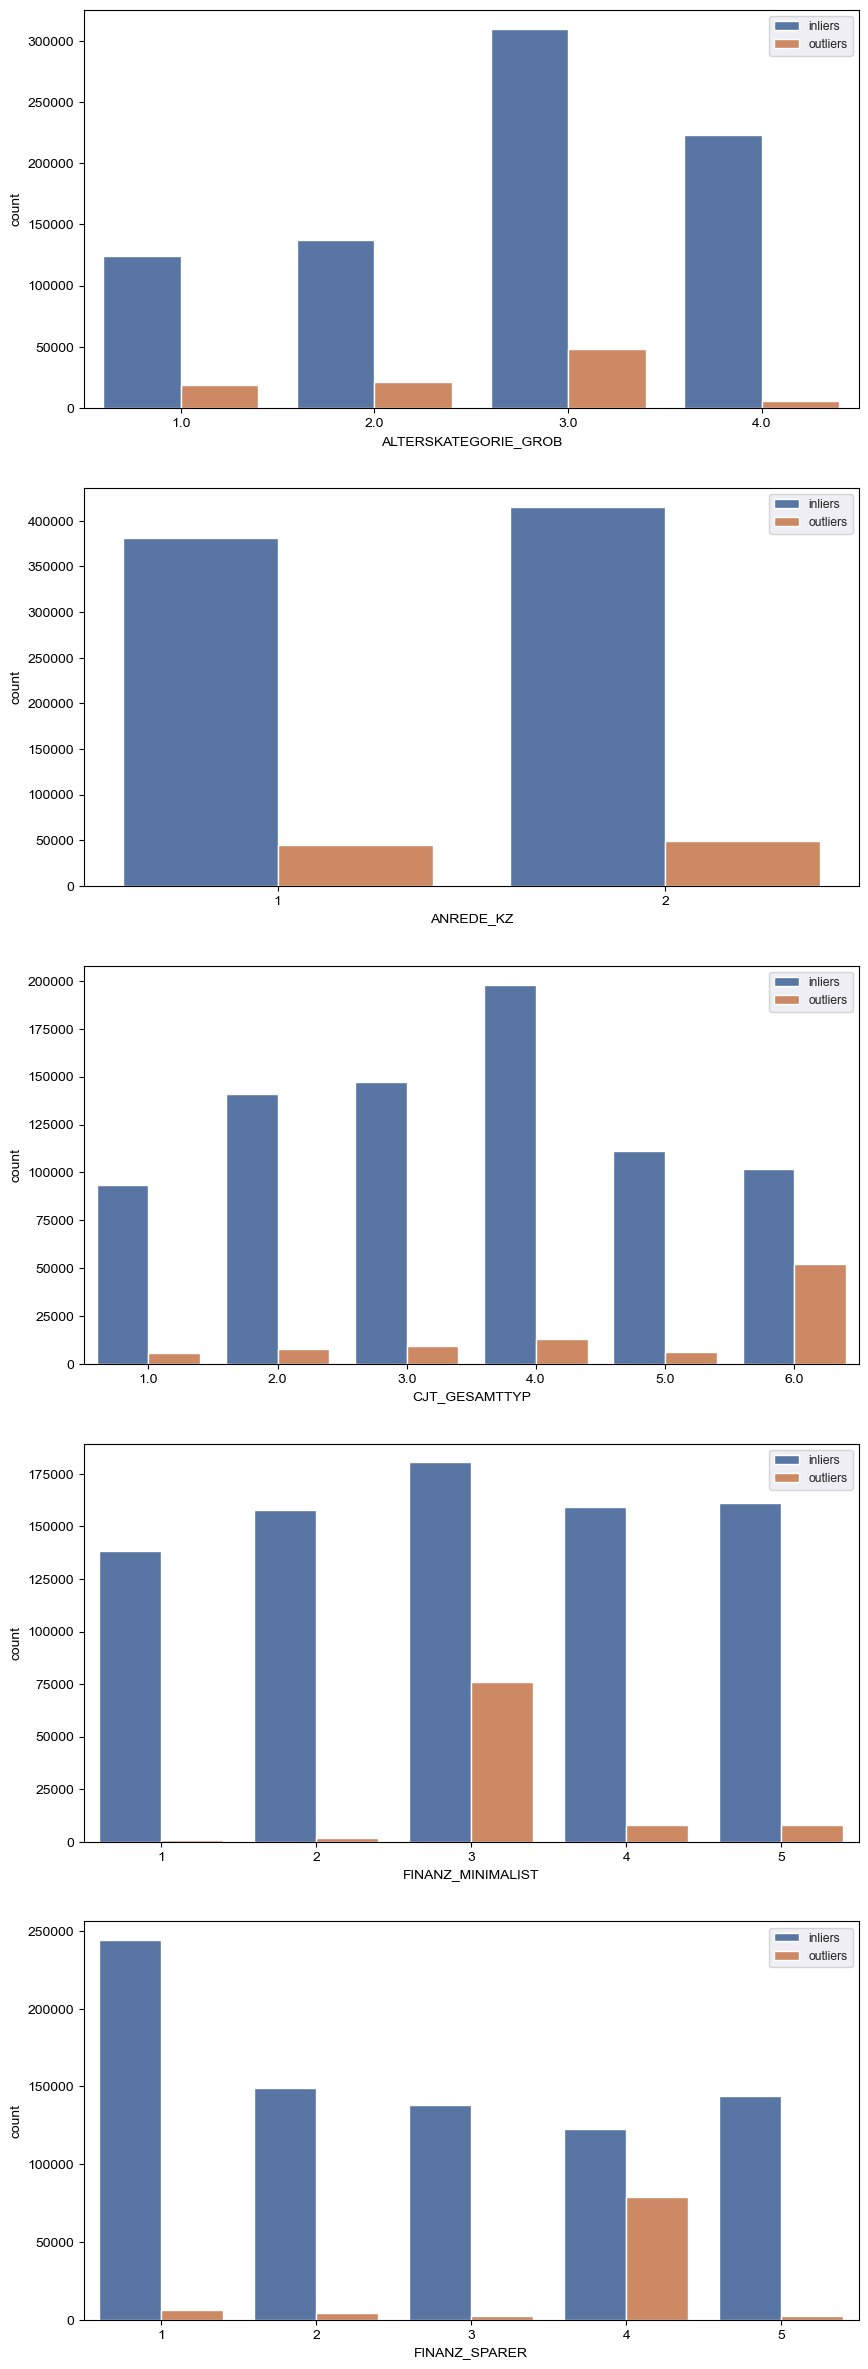

In [22]:
# Plot the comparison chart
fig, axs = plt.subplots(5, figsize=(10, 30))
sns.set(font_scale=0.8)
plot_index = 0
for col in combined_set_interested:
    sns.countplot(data=col, x=col.columns[1], hue=col.columns[0], ax=axs[plot_index])
    axs[plot_index].legend(title=None)
    plot_index += 1

#### Discussion 1.1.3: Assess Missing Data in Each Row

From the sample histogram of first 500 rows plotted, it is clearly visible that there is a split that can be done above and below 25% of the overall missing or unknown data in a row.

By looking into the above distribution comparison between the two subsets on 5 distinct features, we can conclude that the distribution of data on subset1 (demographic_data_inliers) is less biased than the the distribution of data on subset2 (demographic_data_outliers).

### Step 1.2: Select and Re-Encode Features

Checking for missing data isn't the only way in which you can prepare a dataset for analysis. Since the unsupervised learning techniques to be used will only work on data that is encoded numerically, you need to make a few encoding changes or additional assumptions to be able to make progress. In addition, while almost all of the values in the dataset are encoded using numbers, not all of them represent numeric values. Check the third column of the feature summary (`feat_info`) for a summary of types of measurement.
- For numeric and interval data, these features can be kept without changes.
- Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, make the simplifying assumption that the ordinal variables can be treated as being interval in nature (that is, kept without any changes).
- Special handling may be necessary for the remaining two variable types: categorical, and 'mixed'.

In the first two parts of this sub-step, you will perform an investigation of the categorical and mixed-type features and make a decision on each of them, whether you will keep, drop, or re-encode each. Then, in the last part, you will create a new data frame with only the selected and engineered columns.

Data wrangling is often the trickiest part of the data analysis process, and there's a lot of it to be done here. But stick with it: once you're done with this step, you'll be ready to get to the machine learning parts of the project!

In [23]:
# How many features are there of each data type?
num_feature_categories = feat_info.type.value_counts()
num_feature_categories

type
ordinal        49
categorical    21
numeric         7
mixed           7
interval        1
Name: count, dtype: int64

#### Step 1.2.1: Re-Encode Categorical Features

For categorical data, you would ordinarily need to encode the levels as dummy variables. Depending on the number of categories, perform one of the following:
- For binary (two-level) categoricals that take numeric values, you can keep them without needing to do anything.
- There is one binary variable that takes on non-numeric values. For this one, you need to re-encode the values as numbers or create a dummy variable.
- For multi-level categoricals (three or more values), you can choose to encode the values using multiple dummy variables (e.g. via [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)), or (to keep things straightforward) just drop them from the analysis. As always, document your choices in the Discussion section.

In [24]:
# Assess categorical variables: which are binary, which are multi-level, and
# which one needs to be re-encoded?
print("====================")
print("Categorical Features")
print("====================")
for i in range(0, len(feat_info)):
    if (feat_info.type[i] == 'categorical'):
        if feat_info.attribute[i] in demographic_data_inliers.columns:
            print(feat_info.attribute[i], ": ", demographic_data_inliers[feat_info.attribute[i]].unique().tolist())

Categorical Features
ANREDE_KZ :  [2, 1]
CJT_GESAMTTYP :  [5.0, 3.0, 2.0, 4.0, 1.0, 6.0, nan]
FINANZTYP :  [1, 6, 5, 2, 4, 3]
GFK_URLAUBERTYP :  [10.0, 1.0, 5.0, 12.0, 9.0, 3.0, 8.0, 11.0, 4.0, 2.0, 7.0, 6.0, nan]
GREEN_AVANTGARDE :  [0, 1]
LP_FAMILIE_FEIN :  [5.0, 1.0, nan, 10.0, 2.0, 7.0, 11.0, 8.0, 4.0, 6.0, 9.0, 3.0]
LP_FAMILIE_GROB :  [3.0, 1.0, nan, 5.0, 2.0, 4.0]
LP_STATUS_FEIN :  [2.0, 3.0, 9.0, 4.0, 1.0, 10.0, 5.0, 8.0, 6.0, 7.0, nan]
LP_STATUS_GROB :  [1.0, 2.0, 4.0, 5.0, 3.0, nan]
NATIONALITAET_KZ :  [1.0, 3.0, 2.0, nan]
SHOPPER_TYP :  [3.0, 2.0, 1.0, 0.0, nan]
SOHO_KZ :  [1.0, 0.0]
VERS_TYP :  [2.0, 1.0, nan]
ZABEOTYP :  [5, 3, 4, 1, 6, 2]
GEBAEUDETYP :  [8.0, 1.0, 3.0, 2.0, 6.0, 4.0, 5.0]
OST_WEST_KZ :  ['W', 'O']
CAMEO_DEUG_2015 :  ['8', '4', '2', '6', '1', '9', '5', '7', nan, '3']
CAMEO_DEU_2015 :  ['8A', '4C', '2A', '6B', '8C', '4A', '2D', '1A', '1E', '9D', '5C', '8B', '7A', '5D', '9E', nan, '9B', '1B', '3D', '4E', '4B', '3C', '5A', '7B', '9A', '6D', '6E', '2C', '7C', '

In [25]:
# Re-encode categorical variable(s) to be kept in the analysis.
## Converting the char binary to binary values.
demographic_data_inliers_updated = pd.get_dummies(demographic_data_inliers, columns=['OST_WEST_KZ'], dtype=np.uint8)

In [26]:
demographic_data_inliers_updated.shape

(797077, 80)

In [27]:
# Dropping the multi-level categorical features
outlier_columns_2 = []
for i in range(0, len(feat_info)):
    if (feat_info.type[i] == 'categorical'):
        if (feat_info.attribute[i] in demographic_data_inliers_updated.columns):
            if (demographic_data_inliers[feat_info.attribute[i]].nunique() >= 3):
                demographic_data_inliers_updated.drop(feat_info.attribute[i], axis=1, inplace=True)
                print("Dropped: ", feat_info.attribute[i])
                outlier_columns_2.append(feat_info.attribute[i])
            

Dropped:  CJT_GESAMTTYP
Dropped:  FINANZTYP
Dropped:  GFK_URLAUBERTYP
Dropped:  LP_FAMILIE_FEIN
Dropped:  LP_FAMILIE_GROB
Dropped:  LP_STATUS_FEIN
Dropped:  LP_STATUS_GROB
Dropped:  NATIONALITAET_KZ
Dropped:  SHOPPER_TYP
Dropped:  ZABEOTYP
Dropped:  GEBAEUDETYP
Dropped:  CAMEO_DEUG_2015
Dropped:  CAMEO_DEU_2015


In [28]:
demographic_data_inliers_updated.shape

(797077, 67)

#### Discussion 1.2.1: Re-Encode Categorical Features
Collected all the categorical features. Keeping the numerical binary categorical features as it is. Modified the binary non-numerical feature named "OST_WEST_KZ" with a dummy numerical binary variable. Dropped all the categorical features which are having 3 or more distinct categorical data entries.

#### Step 1.2.2: Engineer Mixed-Type Features

There are a handful of features that are marked as "mixed" in the feature summary that require special treatment in order to be included in the analysis. There are two in particular that deserve attention; the handling of the rest are up to your own choices:
- "PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). While there aren't enough levels to disentangle east from west, you should create two new variables to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.
- "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).
- If you decide to keep or engineer new features around the other mixed-type features, make sure you note your steps in the Discussion section.

Be sure to check `Data_Dictionary.md` for the details needed to finish these tasks.

In [29]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.
index = [i for i in range(1, 16)]
map_pj_movement = pd.Series([40, 40, 50, 50, 60, 60, 60, 70, 70, 80, 80, 80, 80, 90, 90], 
                            index=index)
map_pj_decade = pd.Series([0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1], 
                          index=index)

demographic_data_inliers_updated['PRAEGENDE_JUGENDJAHRE_MOVEMENT'] = demographic_data_inliers_updated['PRAEGENDE_JUGENDJAHRE'].apply(lambda x: np.nan if np.isnan(x) else map_pj_movement[x])
# demographic_data_inliers_updated['PRAEGENDE_JUGENDJAHRE_MOVEMENT'].unique()

demographic_data_inliers_updated['PRAEGENDE_JUGENDJAHRE_DECADE'] = demographic_data_inliers_updated['PRAEGENDE_JUGENDJAHRE'].apply(lambda x: np.nan if np.isnan(x) else map_pj_decade[x])
# demographic_data_inliers_updated['PRAEGENDE_JUGENDJAHRE_DECADE'].unique()

In [30]:
# Investigate "CAMEO_INTL_2015" and engineer two new variables.
demographic_data_inliers_updated['CAMEO_INTL_2015_WEALTH'] = demographic_data_inliers_updated['CAMEO_INTL_2015'].apply(lambda x: np.nan if np.isnan(float(x)) else int(str(x)[0]))
# demographic_data_inliers_updated['CAMEO_INTL_2015_WEALTH'].unique()

demographic_data_inliers_updated['CAMEO_INTL_2015_LIFE_STAGE'] = demographic_data_inliers_updated['CAMEO_INTL_2015'].apply(lambda x: np.nan if np.isnan(float(x)) else int(str(x)[1]))
# demographic_data_inliers_updated['CAMEO_INTL_2015_LIFE_STAGE'].unique()

In [31]:
demographic_data_inliers_updated.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,PRAEGENDE_JUGENDJAHRE,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SOHO_KZ,VERS_TYP,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,KONSUMNAEHE,MIN_GEBAEUDEJAHR,WOHNLAGE,CAMEO_INTL_2015,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,OST_WEST_KZ_O,OST_WEST_KZ_W,PRAEGENDE_JUGENDJAHRE_MOVEMENT,PRAEGENDE_JUGENDJAHRE_DECADE,CAMEO_INTL_2015_WEALTH,CAMEO_INTL_2015_LIFE_STAGE
1,1.0,2,1,5,2,5,4,5,0,3.0,21.0,6.0,14.0,1.0,5,4,4,3,1,2,2,3,6,4,7,4,7,6,1.0,2.0,2.0,0.0,6.0,3.0,9.0,11.0,0.0,1.0,1992.0,4.0,51,0.0,0.0,0.0,2.0,1.0,6.0,3.0,8.0,3.0,2.0,1.0,3.0,3.0,963.0,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0,0,1,90.0,0.0,5.0,1.0
2,3.0,2,1,4,1,2,3,5,1,3.0,3.0,1.0,15.0,3.0,4,1,3,3,4,4,6,3,4,7,7,7,3,3,0.0,1.0,1.0,0.0,4.0,3.0,9.0,10.0,0.0,5.0,1992.0,2.0,24,1.0,3.0,1.0,0.0,3.0,2.0,4.0,4.0,4.0,2.0,3.0,2.0,2.0,712.0,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0,0,1,90.0,1.0,2.0,4.0
3,4.0,2,4,2,5,2,1,2,0,2.0,NaN,NaN,8.0,2.0,5,1,2,1,4,4,7,4,3,4,4,5,4,4,0.0,1.0,0.0,0.0,1.0,NaN,9.0,1.0,0.0,4.0,1997.0,7.0,12,4.0,1.0,0.0,0.0,4.0,4.0,2.0,6.0,4.0,NaN,4.0,1.0,NaN,596.0,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0,0,1,70.0,0.0,1.0,2.0
4,3.0,1,4,3,4,1,3,2,0,3.0,32.0,10.0,8.0,5.0,6,4,4,2,7,4,4,6,2,3,2,2,4,2,0.0,2.0,4.0,0.0,5.0,2.0,9.0,3.0,0.0,4.0,1992.0,3.0,43,1.0,4.0,1.0,0.0,3.0,2.0,5.0,1.0,5.0,3.0,3.0,5.0,5.0,435.0,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0,0,1,70.0,0.0,4.0,3.0
5,1.0,2,3,1,5,2,2,5,0,3.0,8.0,2.0,3.0,3.0,2,4,7,4,2,2,2,5,7,4,4,4,7,6,0.0,2.0,1.0,0.0,5.0,6.0,9.0,5.0,0.0,5.0,1992.0,7.0,54,2.0,2.0,0.0,0.0,4.0,6.0,2.0,7.0,4.0,4.0,4.0,1.0,5.0,1300.0,2.0,3.0,1.0,1.0,1.0,5.0,5.0,2.0,3.0,3.0,0,1,50.0,0.0,5.0,4.0


In [32]:
# Drop all the features categories of type 'mixed'
for i in range(0, len(feat_info)):
    if (feat_info.type[i] == 'mixed'):
        if (feat_info.attribute[i] in demographic_data_inliers_updated.columns):
            demographic_data_inliers_updated.drop(feat_info.attribute[i], axis=1, inplace=True)
            print("Dropped: ", feat_info.attribute[i])
            outlier_columns_2.append(feat_info.attribute[i])

Dropped:  LP_LEBENSPHASE_FEIN
Dropped:  LP_LEBENSPHASE_GROB
Dropped:  PRAEGENDE_JUGENDJAHRE
Dropped:  WOHNLAGE
Dropped:  CAMEO_INTL_2015
Dropped:  PLZ8_BAUMAX


In [33]:
demographic_data_inliers_updated.shape

(797077, 65)

#### Discussion 1.2.2: Engineer Mixed-Type Features
There are two mixed features ("PRAEGENDE_JUGENDJAHRE" and "CAMEO_INTL_2015) that are dropped and seperated into two sub-categories respectively.
"PRAEGENDE_JUGENDJAHRE" is seperated into "PRAEGENDE_JUGENDJAHRE_MOVEMENT" and "PRAEGENDE_JUGENDJAHRE_DECADE" and
"CAMEO_INTL_2015" is seperated into "CAMEO_INTL_2015_WEALTH" and "CAMEO_INTL_2015_LIFE_STAGE".
All the other mixed features are dropped.


#### Step 1.2.3: Complete Feature Selection

In order to finish this step up, you need to make sure that your data frame now only has the columns that you want to keep. To summarize, the dataframe should consist of the following:
- All numeric, interval, and ordinal type columns from the original dataset.
- Binary categorical features (all numerically-encoded).
- Engineered features from other multi-level categorical features and mixed features.

Make sure that for any new columns that you have engineered, that you've excluded the original columns from the final dataset. Otherwise, their values will interfere with the analysis later on the project. For example, you should not keep "PRAEGENDE_JUGENDJAHRE", since its values won't be useful for the algorithm: only the values derived from it in the engineered features you created should be retained. As a reminder, your data should only be from **the subset with few or no missing values**.

In [34]:
# If there are other re-engineering tasks you need to perform, make sure you
# take care of them here. (Dealing with missing data will come in step 2.1.)

In [35]:
# Do whatever you need to in order to ensure that the dataframe only contains
# the columns that should be passed to the algorithm functions.



### Step 1.3: Create a Cleaning Function

Even though you've finished cleaning up the general population demographics data, it's important to look ahead to the future and realize that you'll need to perform the same cleaning steps on the customer demographics data. In this substep, complete the function below to execute the main feature selection, encoding, and re-engineering steps you performed above. Then, when it comes to looking at the customer data in Step 3, you can just run this function on that DataFrame to get the trimmed dataset in a single step.

In [36]:
def clean_data(df):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
    
    INPUT: Demographics DataFrame
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """
    
    # Put in code here to execute all main cleaning steps:
    # convert missing value codes into NaNs, ...
    na_demographic_data = df[:]
    ## Replace the missing or unknown codes in the demographic data with np.NaN
    for att in na_demographic_data.columns:
        na_demographic_data[att].replace(att_index.loc[att].loc['na_tags'], np.NaN, inplace=True)
    
    # remove selected columns and rows, ...
    ## Remove the outlier columns first
    demographic_data_cleaned = na_demographic_data.drop(outlier_columns, axis=1)
    ## Remove the outlier rows
    num_missing_row_percentage = (demographic_data_cleaned.isna().sum(axis=1)) * 100 / demographic_data_cleaned.shape[1]
    num_lesser_than_thresh = (num_missing_row_percentage < 25.0)
    demographic_data_inliers = demographic_data_cleaned[num_lesser_than_thresh]
    
    # select, re-encode, and engineer column values.
    ## Converting the char binary to numerical binary values.
    df = pd.get_dummies(demographic_data_inliers, columns=['OST_WEST_KZ'], dtype=np.uint8)
    ## Update the 'PRAEGENDE_JUGENDJAHRE' mixed feature
    df['PRAEGENDE_JUGENDJAHRE_MOVEMENT'] = df['PRAEGENDE_JUGENDJAHRE'].apply(lambda x: np.nan if np.isnan(x) else map_pj_movement[x])
    df['PRAEGENDE_JUGENDJAHRE_DECADE'] = df['PRAEGENDE_JUGENDJAHRE'].apply(lambda x: np.nan if np.isnan(x) else map_pj_decade[x])
    ## Update the 'CAMEO_INTL_2015' mixed feature
    df['CAMEO_INTL_2015_WEALTH'] = df['CAMEO_INTL_2015'].apply(lambda x: np.nan if np.isnan(float(x)) else int(str(x)[0]))
    df['CAMEO_INTL_2015_LIFE_STAGE'] = df['CAMEO_INTL_2015'].apply(lambda x: np.nan if np.isnan(float(x)) else int(str(x)[1]))
    ## Remove all the remaining outlier columns from the dataset
    for outlier_col in outlier_columns_2:
        df.drop(outlier_col, axis=1, inplace=True)
        
    # Return the cleaned dataframe.
    return df

## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling

Before we apply dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. Starting from this part of the project, you'll want to keep an eye on the [API reference page for sklearn](http://scikit-learn.org/stable/modules/classes.html) to help you navigate to all of the classes and functions that you'll need. In this substep, you'll need to check the following:

- sklearn requires that data not have missing values in order for its estimators to work properly. So, before applying the scaler to your data, make sure that you've cleaned the DataFrame of the remaining missing values. This can be as simple as just removing all data points with missing data, or applying an [Imputer](https://scikit-learn.org/0.16/modules/generated/sklearn.preprocessing.Imputer.html) to replace all missing values. You might also try a more complicated procedure where you temporarily remove missing values in order to compute the scaling parameters before re-introducing those missing values and applying imputation. Think about how much missing data you have and what possible effects each approach might have on your analysis, and justify your decision in the discussion section below.
- For the actual scaling function, a [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) instance is suggested, scaling each feature to mean 0 and standard deviation 1.
- For these classes, you can make use of the `.fit_transform()` method to both fit a procedure to the data as well as apply the transformation to the data at the same time. Don't forget to keep the fit sklearn objects handy, since you'll be applying them to the customer demographics data towards the end of the project.

In [37]:
# If you've not yet cleaned the dataset of all NaN values, then investigate and
# do that now.
from sklearn.impute import SimpleImputer
simple_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
demographic_data = simple_imputer.fit_transform(demographic_data_inliers_updated)

In [38]:
# Apply feature scaling to the general population demographics data.
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
demographic_data = standard_scaler.fit_transform(demographic_data)

### Discussion 2.1: Apply Feature Scaling

Using imputer by passing the argument for the "missing_values" as "np.nan" and the strategy used here is "mean". Then the cleaned dataset is now passed to the standard scaler for feature scaling.

### Step 2.2: Perform Dimensionality Reduction

On your scaled data, you are now ready to apply dimensionality reduction techniques.

- Use sklearn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to apply principal component analysis on the data, thus finding the vectors of maximal variance in the data. To start, you should not set any parameters (so all components are computed) or set a number of components that is at least half the number of features (so there's enough features to see the general trend in variability).
- Check out the ratio of variance explained by each principal component as well as the cumulative variance explained. Try plotting the cumulative or sequential values using matplotlib's [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) function. Based on what you find, select a value for the number of transformed features you'll retain for the clustering part of the project.
- Once you've made a choice for the number of components to keep, make sure you re-fit a PCA instance to perform the decided-on transformation.

In [39]:
# Apply PCA to the data.
from sklearn.decomposition import PCA
pca = PCA()
# Fit the data into to form the model
model = pca.fit_transform(demographic_data)

In [40]:
# Investigate the variance accounted for by each principal component.
## Function to plot PCA components
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
#     for i in range(num_components):
#         ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

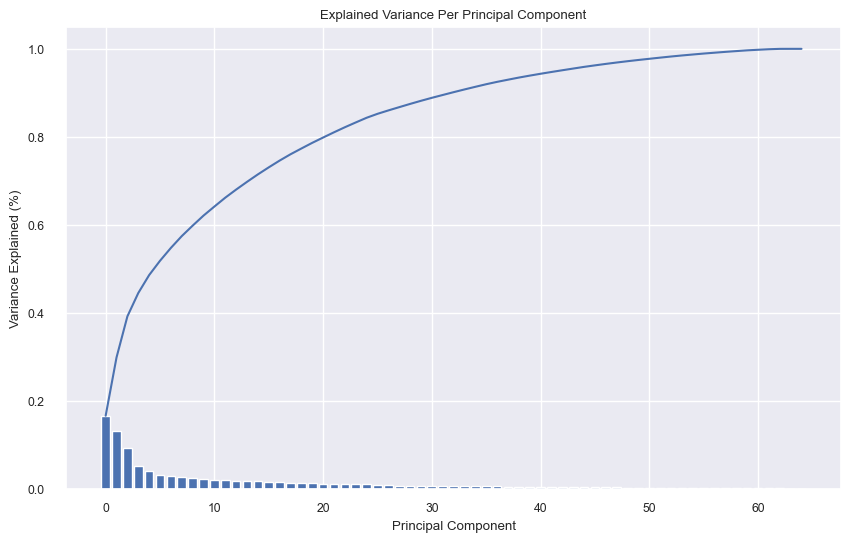

In [41]:
scree_plot(pca)

In [42]:
# Re-apply PCA to the data while selecting for number of components to retain.
pca = PCA(n_components=30)
demographic_data_pca_model = pca.fit_transform(demographic_data)
pca.explained_variance_ratio_.sum()

0.8817623959984867

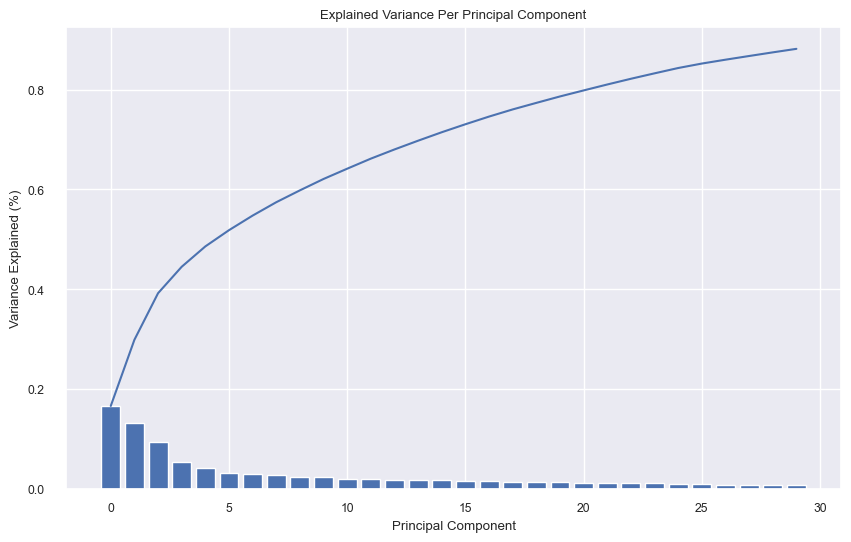

In [43]:
scree_plot(pca)

### Discussion 2.2: Perform Dimensionality Reduction
When applying PCA with default values, it captures keeps all the components. But almost 88% of the features are catures in about 30 PCA components. So, that is the reason I chose 30 components for clustering.

### Step 2.3: Interpret Principal Components

Now that we have our transformed principal components, it's a nice idea to check out the weight of each variable on the first few components to see if they can be interpreted in some fashion.

As a reminder, each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

- To investigate the features, you should map each weight to their corresponding feature name, then sort the features according to weight. The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list. Use the data dictionary document to help you understand these most prominent features, their relationships, and what a positive or negative value on the principal component might indicate.
- You should investigate and interpret feature associations from the first three principal components in this substep. To help facilitate this, you should write a function that you can call at any time to print the sorted list of feature weights, for the *i*-th principal component. This might come in handy in the next step of the project, when you interpret the tendencies of the discovered clusters.

In [44]:
demographic_data = clean_data(pd.read_csv('Udacity_AZDIAS_Subset.csv', sep=';'))

/var/folders/yj/9my9v6pj42vfm5ppv37xtk9w0000gn/T/ipykernel_94817/2854634498.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  na_demographic_data[att].replace(att_index.loc[att].loc['na_tags'], np.NaN, inplace=True)


In [45]:
def pca_results(full_dataset, pca, component_index):
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns=full_dataset.keys())
    component = components.iloc[component_index-1]
    component.sort_values(ascending=False, inplace=True)
    first_and_last_n_feat_of_comp = pd.concat([component.head(5), component.tail(5)])
    plt.bar(first_and_last_n_feat_of_comp.index, first_and_last_n_feat_of_comp.values)
    plt.xticks(first_and_last_n_feat_of_comp.index, rotation=90, fontsize=8)
    plt.ylabel("Feature Weights")
    plt.title("First and last 5 feature weights of PCA Component {}".format(component_index))
    plt.show()
    print("==================")
    print("Component Index: {}".format(component_index))
    print("==================")
    print(component)

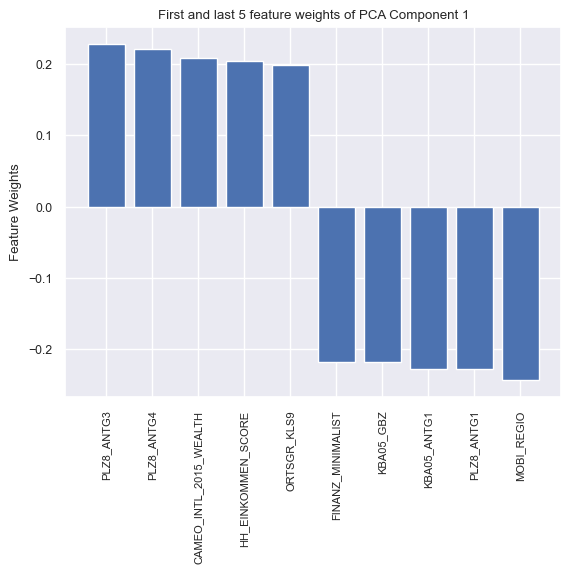

Component Index: 1
PLZ8_ANTG3                        0.2278
PLZ8_ANTG4                        0.2213
CAMEO_INTL_2015_WEALTH            0.2084
HH_EINKOMMEN_SCORE                0.2045
ORTSGR_KLS9                       0.1980
EWDICHTE                          0.1956
FINANZ_HAUSBAUER                  0.1647
KBA05_ANTG4                       0.1541
PLZ8_ANTG2                        0.1536
ARBEIT                            0.1466
FINANZ_SPARER                     0.1407
ANZ_HAUSHALTE_AKTIV               0.1369
KBA05_ANTG3                       0.1360
RELAT_AB                          0.1359
SEMIO_PFLICHT                     0.1096
SEMIO_REL                         0.1069
PRAEGENDE_JUGENDJAHRE_MOVEMENT    0.0955
SEMIO_RAT                         0.0899
SEMIO_TRADV                       0.0834
SEMIO_MAT                         0.0746
SEMIO_FAM                         0.0740
REGIOTYP                          0.0729
SEMIO_KULT                        0.0683
FINANZ_UNAUFFAELLIGER             0.06

In [46]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.
# HINT: Try defining a function here or in a new cell that you can reuse in the
# other cells.
pca_results(demographic_data, pca, 1)

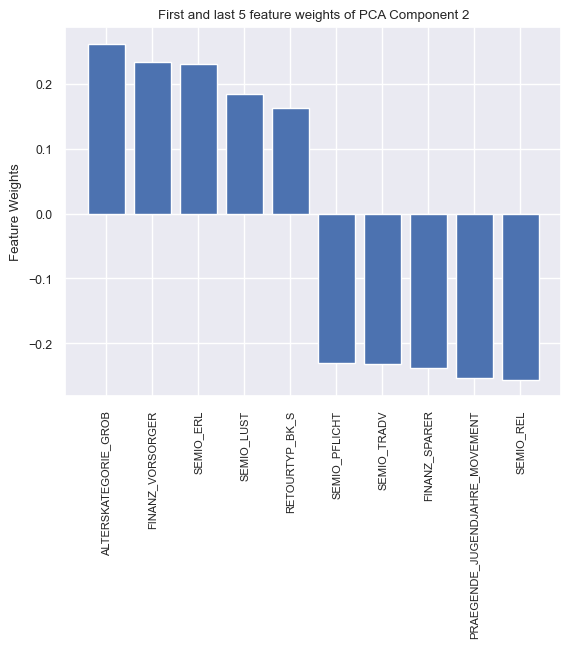

Component Index: 2
ALTERSKATEGORIE_GROB              0.2623
FINANZ_VORSORGER                  0.2345
SEMIO_ERL                         0.2315
SEMIO_LUST                        0.1849
RETOURTYP_BK_S                    0.1637
W_KEIT_KIND_HH                    0.1189
FINANZ_HAUSBAUER                  0.1144
SEMIO_KRIT                        0.1144
SEMIO_KAEM                        0.1104
ANREDE_KZ                         0.0892
PLZ8_ANTG3                        0.0868
EWDICHTE                          0.0858
ORTSGR_KLS9                       0.0847
PLZ8_ANTG4                        0.0831
FINANZ_MINIMALIST                 0.0712
CAMEO_INTL_2015_WEALTH            0.0697
SEMIO_DOM                         0.0696
ARBEIT                            0.0651
KBA05_ANTG4                       0.0647
WOHNDAUER_2008                    0.0623
RELAT_AB                          0.0611
ANZ_HAUSHALTE_AKTIV               0.0598
PLZ8_ANTG2                        0.0590
HH_EINKOMMEN_SCORE                0.05

In [47]:
# Map weights for the second principal component to corresponding feature names
# and then print the linked values, sorted by weight.
pca_results(demographic_data, pca, 2)

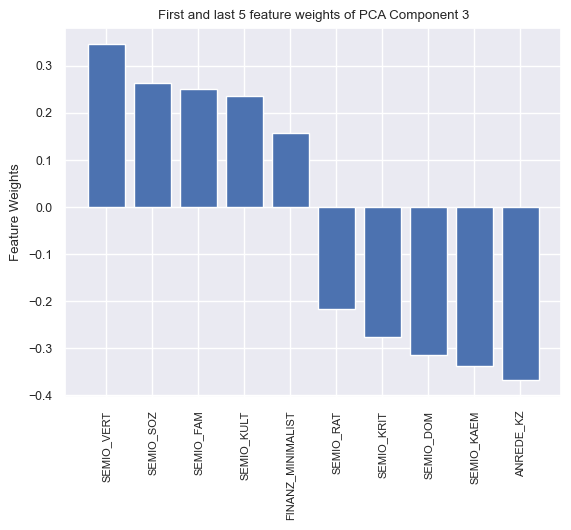

Component Index: 3
SEMIO_VERT                        0.3455
SEMIO_SOZ                         0.2626
SEMIO_FAM                         0.2502
SEMIO_KULT                        0.2357
FINANZ_MINIMALIST                 0.1564
RETOURTYP_BK_S                    0.1079
FINANZ_VORSORGER                  0.1001
W_KEIT_KIND_HH                    0.0904
ALTERSKATEGORIE_GROB              0.0787
SEMIO_REL                         0.0700
SEMIO_LUST                        0.0643
SEMIO_MAT                         0.0556
GREEN_AVANTGARDE                  0.0465
ORTSGR_KLS9                       0.0448
PRAEGENDE_JUGENDJAHRE_DECADE      0.0446
PLZ8_ANTG4                        0.0444
PLZ8_ANTG3                        0.0437
EWDICHTE                          0.0437
ARBEIT                            0.0354
WOHNDAUER_2008                    0.0331
RELAT_AB                          0.0307
PLZ8_ANTG2                        0.0282
CAMEO_INTL_2015_WEALTH            0.0269
KBA05_ANTG4                       0.02

In [48]:
# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.
pca_results(demographic_data, pca, 3)

### Discussion 2.3: Interpret Principal Components
From the above plot we can conclude that 
1. Component_1:
    This component captures the inverse relation between the population (Number of family houses in the PLZ8 region) and the financial status (income/wealth).
 
2. Component_2:
    This component captures the personality difference and its corresponding financial activities. Example the positive weights indicates that personalities of people are more event-oriented and sensual-minded, they are always financially precautious. Whereas the negative weights indicates that personalities of people are more religious, traditional and dutiful, they are money savers. 
 
3. Component_3:
    This component also captures the personlity difference. People with personalities include dreamful, social and family minded are showing low financial interset and the people with personalities like rational thinking, critical-minded and dominant minded are showing more similar financial decisions.

## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population

You've assessed and cleaned the demographics data, then scaled and transformed them. Now, it's time to see how the data clusters in the principal components space. In this substep, you will apply k-means clustering to the dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.

- Use sklearn's [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) class to perform k-means clustering on the PCA-transformed data.
- Then, compute the average difference from each point to its assigned cluster's center. **Hint**: The KMeans object's `.score()` method might be useful here, but note that in sklearn, scores tend to be defined so that larger is better. Try applying it to a small, toy dataset, or use an internet search to help your understanding.
- Perform the above two steps for a number of different cluster counts. You can then see how the average distance decreases with an increasing number of clusters. However, each additional cluster provides a smaller net benefit. Use this fact to select a final number of clusters in which to group the data. **Warning**: because of the large size of the dataset, it can take a long time for the algorithm to resolve. The more clusters to fit, the longer the algorithm will take. You should test for cluster counts through at least 10 clusters to get the full picture, but you shouldn't need to test for a number of clusters above about 30.
- Once you've selected a final number of clusters to use, re-fit a KMeans instance to perform the clustering operation. Make sure that you also obtain the cluster assignments for the general demographics data, since you'll be using them in the final Step 3.3.

In [49]:
# Over a number of different cluster counts...
from sklearn.cluster import KMeans
clusters = []
scores = []
for n_clusters in range(1, 30):
    
    # run k-means clustering on the data and...
    kmeans = KMeans(n_clusters=n_clusters)
    
    # Fit the model on the data
    model = kmeans.fit(demographic_data_pca_model)
    # compute the average within-cluster distances.
    score = np.abs(model.score(demographic_data_pca_model))
    scores.append(score)
    clusters.append(n_clusters)

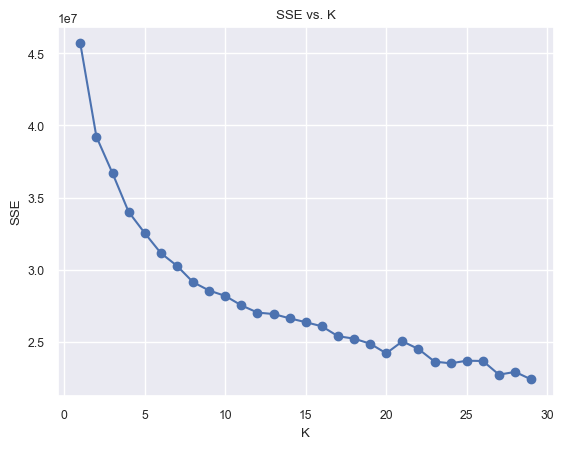

In [50]:
# Investigate the change in within-cluster distance across number of clusters.
# HINT: Use matplotlib's plot function to visualize this relationship.
plt.plot(clusters, scores, marker='o',);
plt.xlabel('K');
plt.ylabel('SSE');
plt.title('SSE vs. K');


In [51]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.
kmeans = KMeans(n_clusters=10)
model = kmeans.fit(demographic_data_pca_model)

### Discussion 3.1: Apply Clustering to General Population
From the above plot and the Elbow method, the exponential decrease in the SSE (sum of squared error distances) starts to flatten little from 10. So I decided to use 10 as the number of clusters. 

### Step 3.2: Apply All Steps to the Customer Data

Now that you have clusters and cluster centers for the general population, it's time to see how the customer data maps on to those clusters. Take care to not confuse this for re-fitting all of the models to the customer data. Instead, you're going to use the fits from the general population to clean, transform, and cluster the customer data. In the last step of the project, you will interpret how the general population fits apply to the customer data.

- Don't forget when loading in the customers data, that it is semicolon (`;`) delimited.
- Apply the same feature wrangling, selection, and engineering steps to the customer demographics using the `clean_data()` function you created earlier. (You can assume that the customer demographics data has similar meaning behind missing data patterns as the general demographics data.)
- Use the sklearn objects from the general demographics data, and apply their transformations to the customers data. That is, you should not be using a `.fit()` or `.fit_transform()` method to re-fit the old objects, nor should you be creating new sklearn objects! Carry the data through the feature scaling, PCA, and clustering steps, obtaining cluster assignments for all of the data in the customer demographics data.

In [52]:
# Load in the customer demographics data.
customers = pd.read_csv("Udacity_CUSTOMERS_Subset.csv", delimiter=";")

In [53]:
# Apply preprocessing, feature transformation, and clustering from the general
# demographics onto the customer data, obtaining cluster predictions for the
# customer demographics data.
customer_data_cleaned = clean_data(customers)
customer_data = simple_imputer.transform(customer_data_cleaned)
customer_data = standard_scaler.transform(customer_data)
customer_data_pca = pca.transform(customer_data)
predictions = model.predict(customer_data_pca)

/var/folders/yj/9my9v6pj42vfm5ppv37xtk9w0000gn/T/ipykernel_94817/2854634498.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  na_demographic_data[att].replace(att_index.loc[att].loc['na_tags'], np.NaN, inplace=True)


### Step 3.3: Compare Customer Data to Demographics Data

At this point, you have clustered data based on demographics of the general population of Germany, and seen how the customer data for a mail-order sales company maps onto those demographic clusters. In this final substep, you will compare the two cluster distributions to see where the strongest customer base for the company is.

Consider the proportion of persons in each cluster for the general population, and the proportions for the customers. If we think the company's customer base to be universal, then the cluster assignment proportions should be fairly similar between the two. If there are only particular segments of the population that are interested in the company's products, then we should see a mismatch from one to the other. If there is a higher proportion of persons in a cluster for the customer data compared to the general population (e.g. 5% of persons are assigned to a cluster for the general population, but 15% of the customer data is closest to that cluster's centroid) then that suggests the people in that cluster to be a target audience for the company. On the other hand, the proportion of the data in a cluster being larger in the general population than the customer data (e.g. only 2% of customers closest to a population centroid that captures 6% of the data) suggests that group of persons to be outside of the target demographics.

Take a look at the following points in this step:

- Compute the proportion of data points in each cluster for the general population and the customer data. Visualizations will be useful here: both for the individual dataset proportions, but also to visualize the ratios in cluster representation between groups. Seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) or [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function could be handy.
  - Recall the analysis you performed in step 1.1.3 of the project, where you separated out certain data points from the dataset if they had more than a specified threshold of missing values. If you found that this group was qualitatively different from the main bulk of the data, you should treat this as an additional data cluster in this analysis. Make sure that you account for the number of data points in this subset, for both the general population and customer datasets, when making your computations!
- Which cluster or clusters are overrepresented in the customer dataset compared to the general population? Select at least one such cluster and infer what kind of people might be represented by that cluster. Use the principal component interpretations from step 2.3 or look at additional components to help you make this inference. Alternatively, you can use the `.inverse_transform()` method of the PCA and StandardScaler objects to transform centroids back to the original data space and interpret the retrieved values directly.
- Perform a similar investigation for the underrepresented clusters. Which cluster or clusters are underrepresented in the customer dataset compared to the general population, and what kinds of people are typified by these clusters?

In [102]:
# Compare the proportion of data in each cluster for the customer data to the
# proportion of data in each cluster for the general population.
## Customer population predictions
from collections import Counter
counts = Counter(predictions)
count_list = [value for key, value in sorted(counts.items())]
total_count = np.sum(count_list)
cluster_list_percentage = (count_list/total_count) * 100

<BarContainer object of 10 artists>

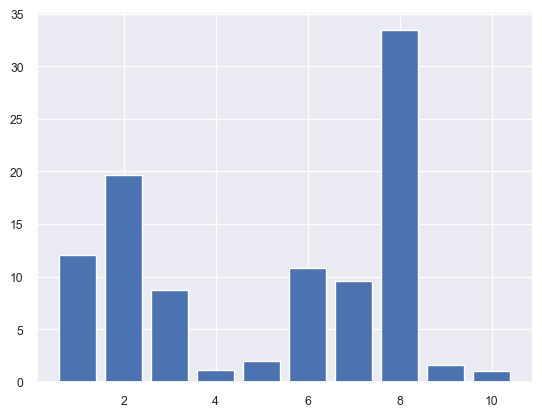

In [103]:
plt.bar(range(1, len(cluster_list_percentage)+1), cluster_list_percentage)

<BarContainer object of 10 artists>

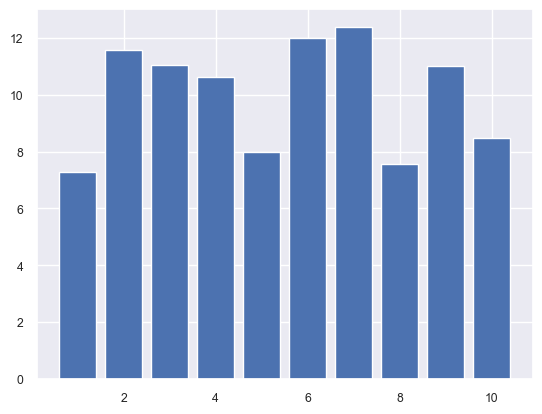

In [104]:
## General population custers
general_population_predictions = model.predict(demographic_data_pca_model)
counts = Counter(general_population_predictions)
count_list = [value for key, value in sorted(counts.items())]
total_count = np.sum(count_list)
cluster_list_percentage = (count_list/total_count) * 100
plt.bar(range(1, len(cluster_list_percentage)+1), cluster_list_percentage)

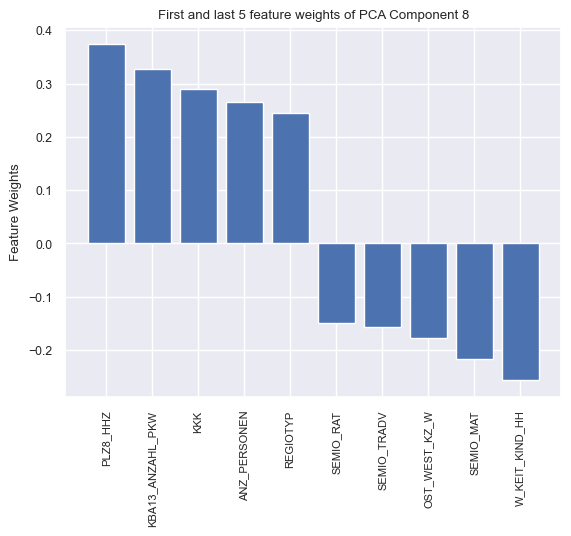

Component Index: 8
PLZ8_HHZ                          0.3741
KBA13_ANZAHL_PKW                  0.3269
KKK                               0.2892
ANZ_PERSONEN                      0.2655
REGIOTYP                          0.2451
ONLINE_AFFINITAET                 0.2151
PLZ8_GBZ                          0.2145
OST_WEST_KZ_O                     0.1768
VERS_TYP                          0.1474
ARBEIT                            0.1471
HEALTH_TYP                        0.1310
FINANZ_ANLEGER                    0.1224
PRAEGENDE_JUGENDJAHRE_MOVEMENT    0.1065
MIN_GEBAEUDEJAHR                  0.0911
PLZ8_ANTG3                        0.0894
GEBAEUDETYP_RASTER                0.0887
PLZ8_ANTG4                        0.0867
ORTSGR_KLS9                       0.0746
ALTERSKATEGORIE_GROB              0.0595
FINANZ_SPARER                     0.0591
SEMIO_ERL                         0.0537
SEMIO_VERT                        0.0504
SEMIO_SOZ                         0.0448
WOHNDAUER_2008                    0.04

In [101]:
# What kinds of people are part of a cluster that is overrepresented in the
# customer data compared to the general population?
df = pca_results(pd.DataFrame(data=customer_data, columns = customer_data_cleaned.columns), pca, 8)

8th cluster is overrepresented in the customer data compared to the general population cluster. This means that cluster 8 that shows strong and popular audience.From the above plot, we can conclude that the cluster with the following features are for person who are popular with mail order company: 
    PLZ8_HHZ, 
    KBA13_ANZAHL_PKW, 
    KKK, 
    ANZ_PERSONEN, 
    REGIOTYP, 
    ONLINE_AFFINITAET.

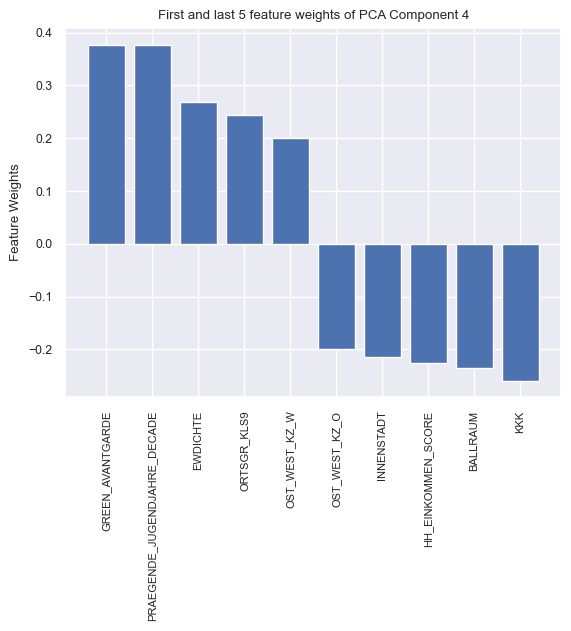

Component Index: 4
GREEN_AVANTGARDE                  0.3775
PRAEGENDE_JUGENDJAHRE_DECADE      0.3774
EWDICHTE                          0.2677
ORTSGR_KLS9                       0.2434
OST_WEST_KZ_W                     0.1998
PLZ8_HHZ                          0.1696
PLZ8_ANTG2                        0.1298
ONLINE_AFFINITAET                 0.1153
SEMIO_DOM                         0.1060
PLZ8_ANTG3                        0.1013
FINANZ_UNAUFFAELLIGER             0.0982
RELAT_AB                          0.0950
KBA13_ANZAHL_PKW                  0.0863
ANZ_PERSONEN                      0.0833
KBA05_ANTG1                       0.0818
PLZ8_ANTG4                        0.0759
SEMIO_KAEM                        0.0736
PLZ8_GBZ                          0.0660
SEMIO_TRADV                       0.0547
FINANZ_MINIMALIST                 0.0529
SEMIO_RAT                         0.0467
ANZ_TITEL                         0.0459
MOBI_REGIO                        0.0441
CAMEO_INTL_2015_LIFE_STAGE        0.03

In [61]:
# What kinds of people are part of a cluster that is underrepresented in the
# customer data compared to the general population?
df = pca_results(pd.DataFrame(data=customer_data, columns = customer_data_cleaned.columns), pca, 4)

4th cluster is underrepresented in the customer data compared to the general population cluster. This means that cluster 4 shows weak or unpopular audiences, but the general population cluster seems accomodate more person in it. From the above plot we can conclude that the cluster with the following features are least popular with the mail order service:
    GREEN_AVANTGARDE, 
    PRAEGENDE_JUGENDJAHRE_DECADE, 
    EWDICHTE, 
    ORTSGR_KLS9, 
    OST_WEST_KZ_W, 
    PLZ8_HH

### Discussion 3.3: Compare Customer Data to Demographics Data
From the ratio comparion between the customer data and the general population data we can conclude that the person who are coming under clusters 1, 2 and 8 are relatively popular with the mail-order company that the ones that are in the clusters 4, 5, 9 and 10.

Person who are coming under cluster 1, 2 and 8 are having some features in common. They are young and live in densly populated regions.

Person who are coming under cluster 4, 5, 9 and 10 are older and mostly living with family houses between 3-10 in a region.

> Congratulations on making it this far in the project! Before you finish, make sure to check through the entire notebook from top to bottom to make sure that your analysis follows a logical flow and all of your findings are documented in **Discussion** cells. Once you've checked over all of your work, you should export the notebook as an HTML document to submit for evaluation. You can do this from the menu, navigating to **File -> Download as -> HTML (.html)**. You will submit both that document and this notebook for your project submission.